In [4]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [5]:
# Training and Test Data Download
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [6]:
# Define the sizes for train and validation sets
train_size = int(0.9 * len(training_data))  
val_size = len(training_data) - train_size  

In [7]:
from torch.utils.data import random_split
train_set, val_set = random_split(training_data, [train_size, val_size])

In [8]:
print(train_set.__len__())
print(val_set.__len__())
print(test_data.__len__())

54000
6000
10000


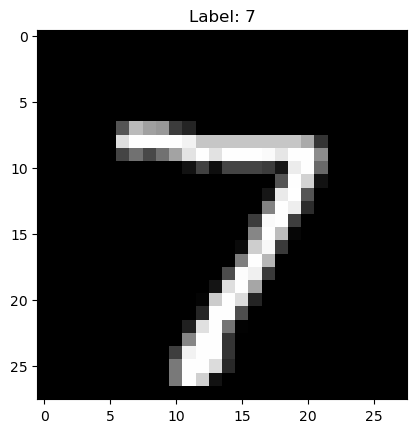

In [9]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Assuming you have already loaded the test_dataset as shown before

# Choose the index of the sample you want to visualize
sample_index = 0

# Get the image and label at the specified index
sample_image, sample_label = test_data[sample_index]

# Create a transform to reverse the normalization applied earlier
inverse_transform = transforms.Compose([transforms.Normalize((-0.5,), (2.0,)), transforms.ToPILImage()])

# Convert the image tensor to a PIL image
sample_image_pil = inverse_transform(sample_image)

# Plot the image
plt.imshow(sample_image_pil, cmap='gray')
plt.title(f'Label: {sample_label}')
plt.show()


In [10]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = DataLoader(val_set, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 2048)
        self.fc2 = nn.Linear(2048, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        output = F.softmax(self.fc3(x), dim=1)
        return output

In [12]:
model = NeuralNetwork()

In [13]:
model

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)

In [14]:
from torchsummary import summary
summary(model, (28, 28, 2048))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2048]       1,607,680
            Linear-2                  [-1, 512]       1,049,088
            Linear-3                   [-1, 10]           5,130
Total params: 2,661,898
Trainable params: 2,661,898
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 6.12
Forward/backward pass size (MB): 0.02
Params size (MB): 10.15
Estimated Total Size (MB): 16.30
----------------------------------------------------------------


In [15]:
from torch import optim
import torch.nn as nn
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [19]:
# Selecting Device for training

'''device = (
    'cuda' if torch.cuda.is_available()
    else 'mps' if torch.backends.mps.is_available()
    else 'cpu'
)'''
device = 'cpu'
print('Device being used : ', device)

Device being used :  cpu


In [20]:
epochs = 10

for epoch in range(epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 1.5236
Epoch [2/10], Loss: 1.4888
Epoch [3/10], Loss: 1.5004
Epoch [4/10], Loss: 1.5423
Epoch [5/10], Loss: 1.5028
Epoch [6/10], Loss: 1.4820
Epoch [7/10], Loss: 1.4820
Epoch [8/10], Loss: 1.5445
Epoch [9/10], Loss: 1.4612
Epoch [10/10], Loss: 1.4612


In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Assuming you have already loaded the test_dataset as shown before

# Choose the index of the sample you want to visualize
sample_index = 0

# Get the image and label at the specified index
sample_image, sample_label = test_data[sample_index]

# Create a transform to reverse the normalization applied earlier
inverse_transform = transforms.Compose([transforms.Normalize((-0.5,), (2.0,)), transforms.ToPILImage()])

# Convert the image tensor to a PIL image
sample_image_pil = inverse_transform(sample_image)

# Plot the image
plt.imshow(sample_image_pil, cmap='gray')
plt.title(f'Label: {sample_label}')
plt.show()


def print_image(image, label):
    

In [21]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 95.82%
